In [1]:
pip install opencv-python mediapipe pyautogui

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 739.8/739.8 kB 2.2 MB/s eta 0:00:00-:--:--
  Created wheel for pyautogui: filename=pyautogui-0.9.54-py3-none-any.whl size=37684 sha256=df8ac09136bb07eab84d040f646e1d63bf29231c2a84379d4511ef784fe4ee77
  Stored in directory: /Users/himanshujha/Library/Caches/pip/wheels/d9/d6/47/04075995b093ecc87c212c9a3dbd34e59456c6fe504d65c3e4
  Created wheel fo

In [1]:
import os
HOME = os.getcwd()
print(HOME)

/Users/himanshujha/Jupyter Contents/Computer Vision Project


In [14]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="FG9SQ1mV1zURP4BPLBPy")
project = rf.workspace("himanshuspace").project("exam-monitoring-system-v2-71fuj")
version = project.version(1)
dataset = version.download("yolov11")
                

loading Roboflow workspace...
loading Roboflow project...


In [2]:
%pip install "ultralytics<=8.3.40" supervision roboflow
# prevent ultralytics from tracking your activity
!yolo settings sync=False
import ultralytics
ultralytics.checks()

Ultralytics 8.3.40 🚀 Python-3.12.7 torch-2.7.0 CPU (Apple M1)
Setup complete ✅ (8 CPUs, 8.0 GB RAM, 144.8/228.3 GB disk)


In [4]:
!yolo task=detect mode=predict model=yolo11n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

Ultralytics 8.3.40 🚀 Python-3.12.7 torch-2.7.0 CPU (Apple M1)
YOLO11n summary (fused): 238 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs

100%|█████████████████████████████████████████| 104k/104k [00:00<00:00, 665kB/s]
image 1/1 /Users/himanshujha/Jupyter Contents/Computer Vision Project/dog.jpeg: 640x384 2 persons, 1 car, 1 dog, 1 handbag, 46.2ms
Speed: 4.0ms preprocess, 46.2ms inference, 7.0ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


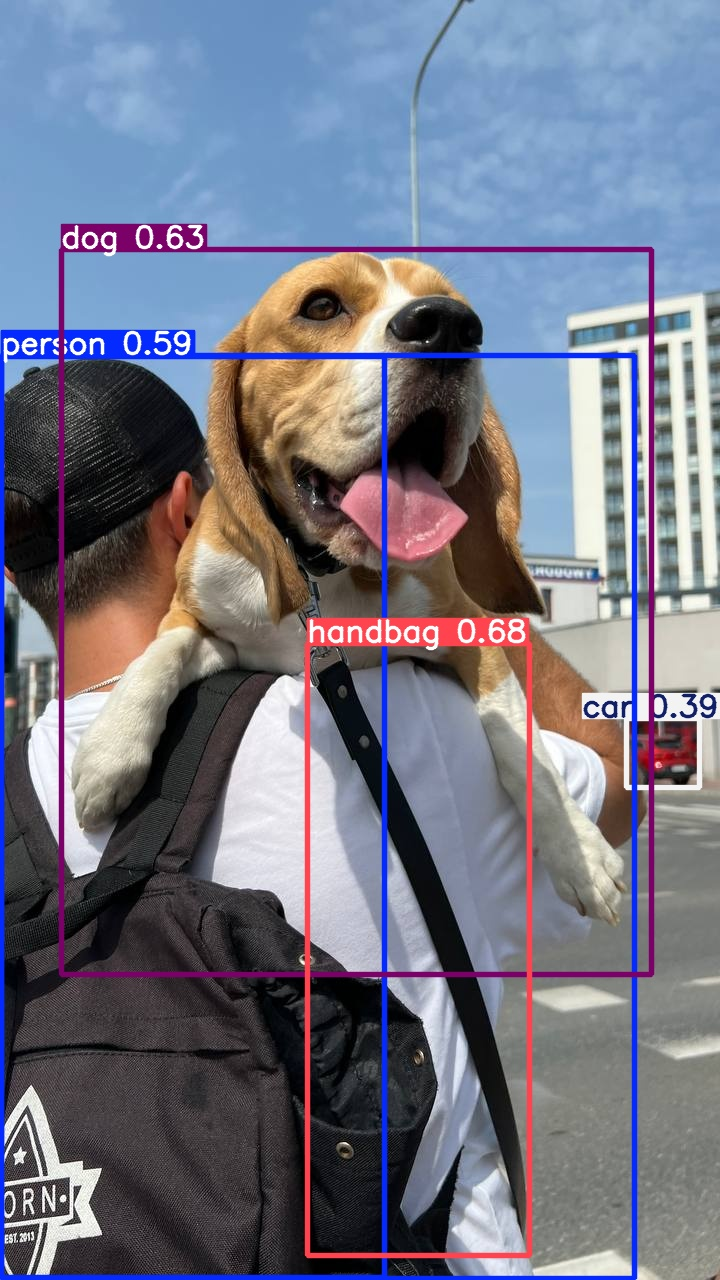

In [5]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/dog.jpg', width=600)

In [6]:
from ultralytics import YOLO
from PIL import Image
import requests

model = YOLO('yolo11n.pt')
image = Image.open(requests.get('https://media.roboflow.com/notebooks/examples/dog.jpeg', stream=True).raw)
result = model.predict(image, conf=0.25)[0]


0: 640x384 2 persons, 1 car, 1 dog, 1 handbag, 70.5ms
Speed: 4.9ms preprocess, 70.5ms inference, 7.2ms postprocess per image at shape (1, 3, 640, 384)


In [7]:
result.boxes.xyxy

tensor([[3.0705e+02, 6.4341e+02, 5.2919e+02, 1.2558e+03],
        [6.1400e+01, 2.4994e+02, 6.5165e+02, 9.7412e+02],
        [1.7803e+00, 3.5551e+02, 6.3404e+02, 1.2788e+03],
        [1.1933e+00, 3.5620e+02, 3.8455e+02, 1.2776e+03],
        [6.2615e+02, 7.1818e+02, 6.9975e+02, 7.8754e+02]])

In [8]:
result.boxes.conf

tensor([0.6832, 0.6284, 0.5941, 0.3923, 0.3875])

In [9]:
result.boxes.cls

tensor([26., 16.,  0.,  0.,  2.])

In [10]:
import supervision as sv

detections = sv.Detections.from_ultralytics(result)

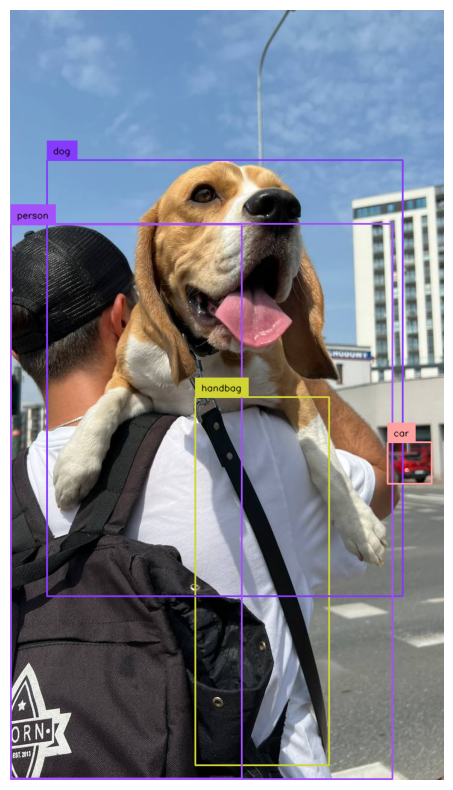

In [11]:
box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator(text_color=sv.Color.BLACK)

annotated_image = image.copy()
annotated_image = box_annotator.annotate(annotated_image, detections=detections)
annotated_image = label_annotator.annotate(annotated_image, detections=detections)

sv.plot_image(annotated_image, size=(10, 10))

In [19]:
!yolo task=detect mode=train model=yolo11s.pt data="/Users/himanshujha/Jupyter Contents/Computer Vision Project/Exam-Monitoring-System-v2-1/data.yaml" epochs=10 imgsz=640 plots=True


New https://pypi.org/project/ultralytics/8.3.154 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.40 🚀 Python-3.12.7 torch-2.7.0 CPU (Apple M1)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/Users/himanshujha/Jupyter Contents/Computer Vision Project/Exam-Monitoring-System-v2-1/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, ret

In [ ]:
!python train.py \
  --img 480 \
  --batch 16 \
  --epochs 20 \
  --Jupyter Contents/Axle Detection_1/Vehicle-Detection-3-1/Vehicle-Detection-3-1/data.yaml \ 
  --weights yolov5s.pt \
  --name yolov5s_results  \
  --cache

In [15]:
dataset.location

'/Users/himanshujha/Jupyter Contents/Computer Vision Project/Exam-Monitoring-System-v2-1'

In [23]:
ls"/Users/himanshujha/Jupyter Contents/Computer Vision Project/runs/detect/train2/"

args.yaml                        train_batch0.jpg
confusion_matrix_normalized.png  train_batch1.jpg
confusion_matrix.png             train_batch2.jpg
F1_curve.png                     val_batch0_labels.jpg
labels_correlogram.jpg           val_batch0_pred.jpg
labels.jpg                       val_batch1_labels.jpg
P_curve.png                      val_batch1_pred.jpg
PR_curve.png                     val_batch2_labels.jpg
R_curve.png                      val_batch2_pred.jpg
results.csv                      weights/
results.png


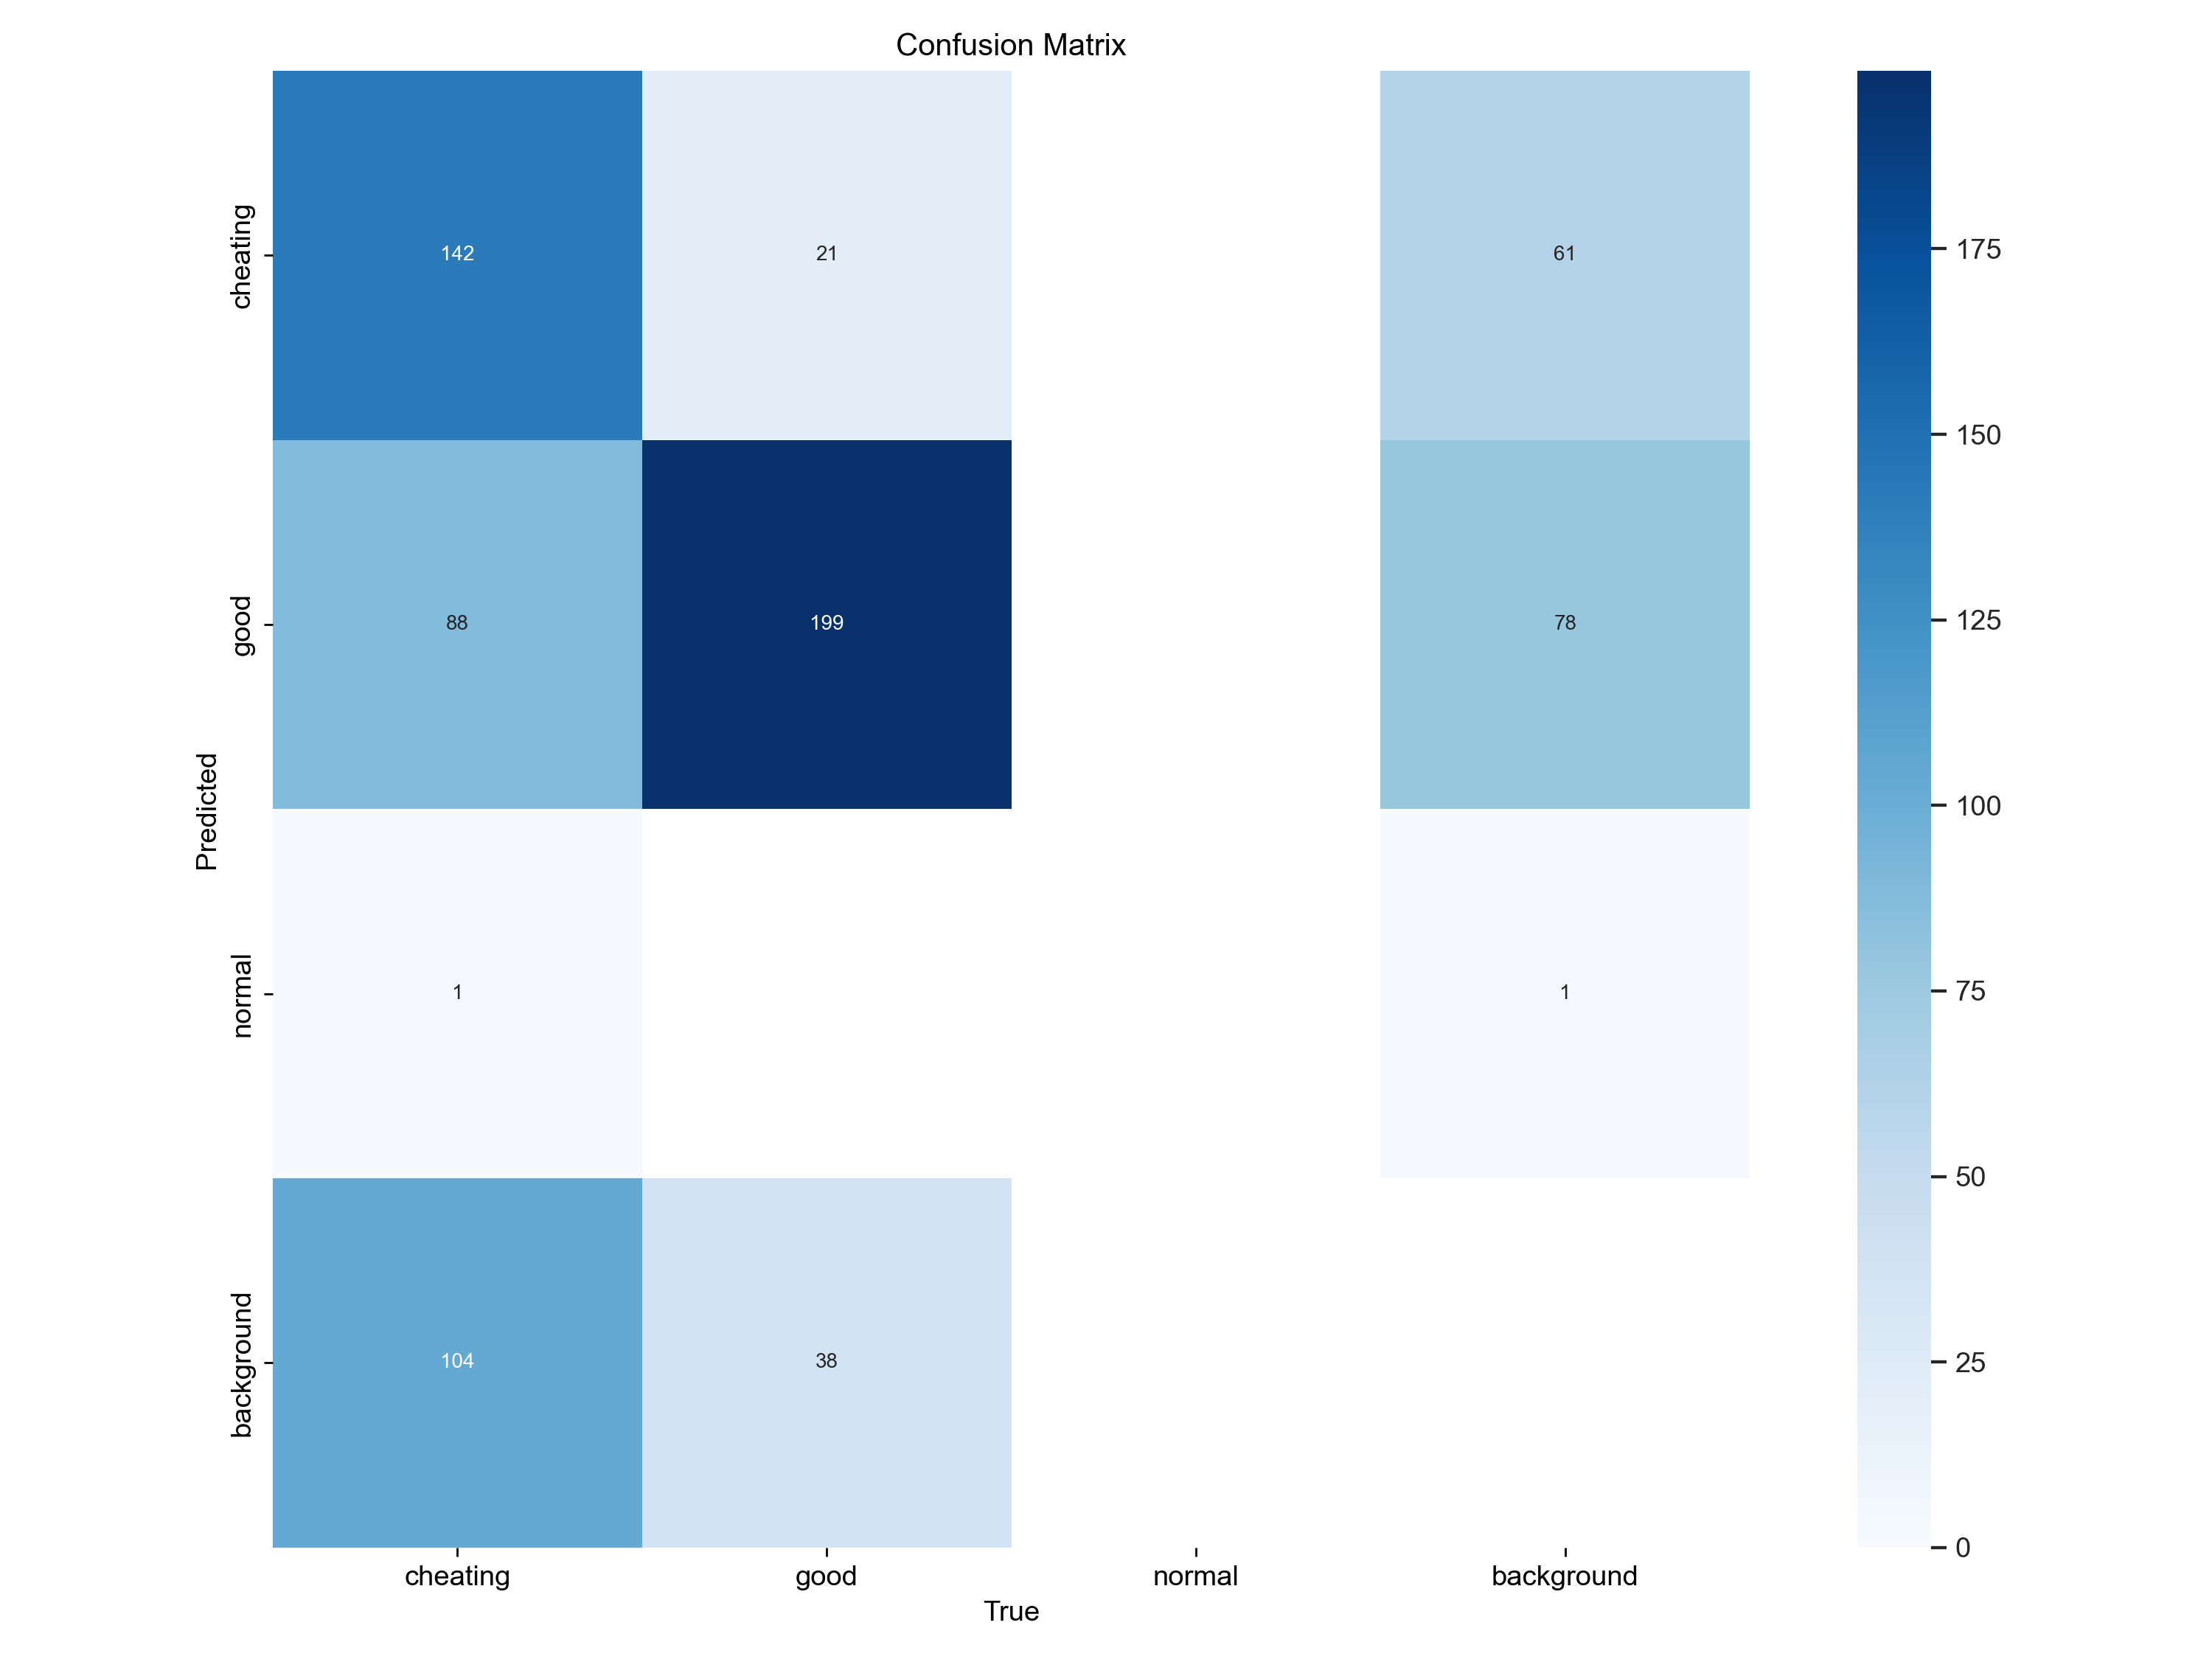

In [24]:
from IPython.display import Image as IPyImage

IPyImage(filename='/Users/himanshujha/Jupyter Contents/Computer Vision Project//runs/detect/train2/confusion_matrix.png', width=600)

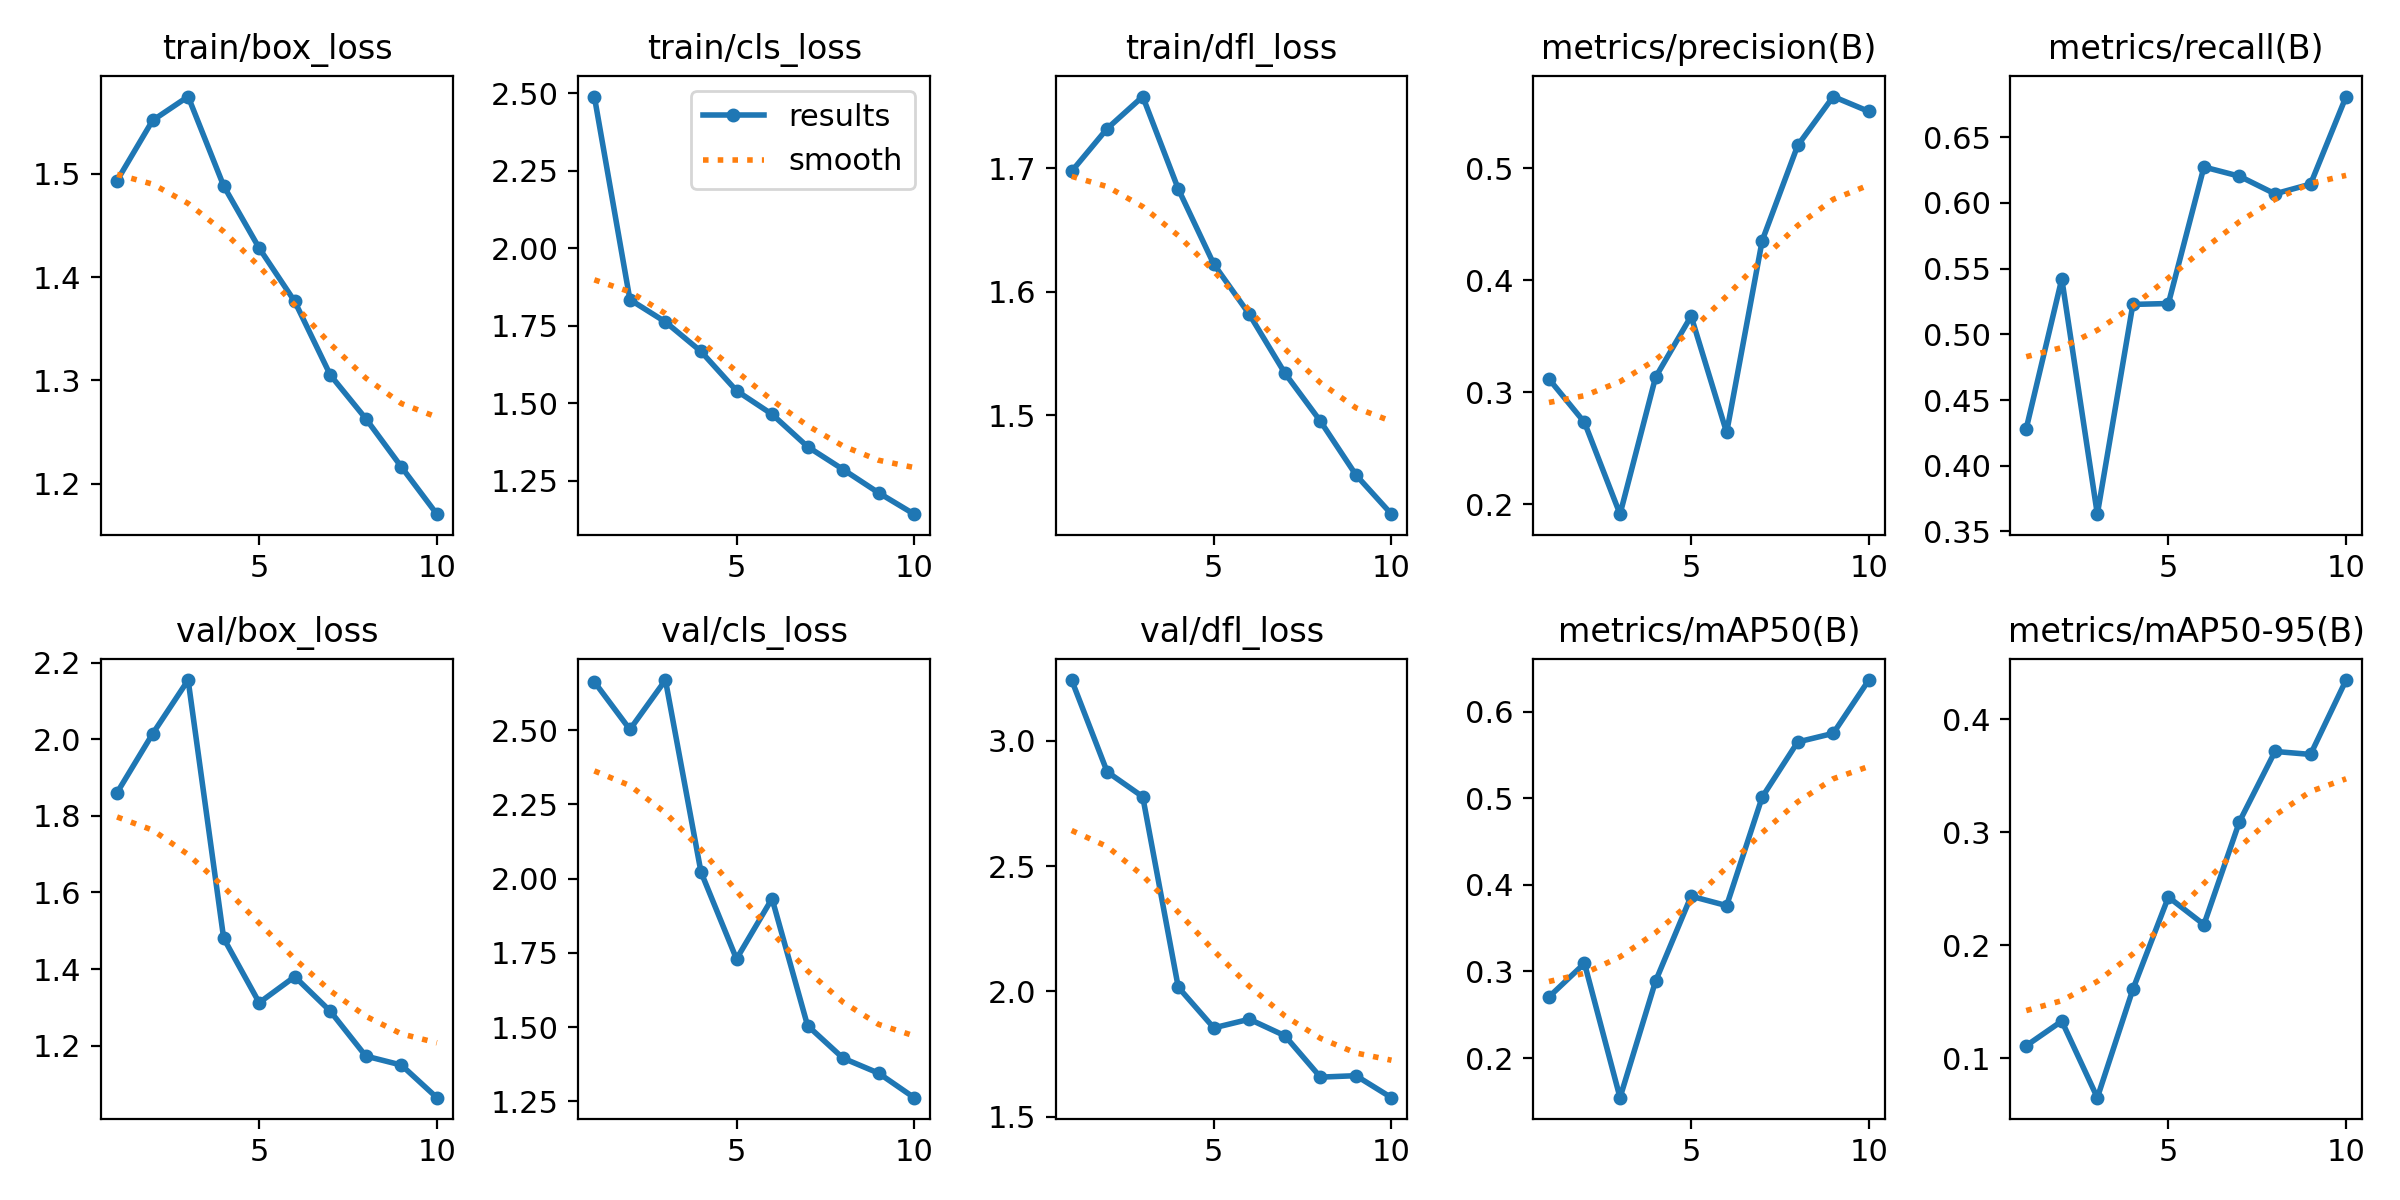

In [26]:
from IPython.display import Image as IPyImage

IPyImage(filename='/Users/himanshujha/Jupyter Contents/Computer Vision Project/runs/detect/train2/results.png', width=600)

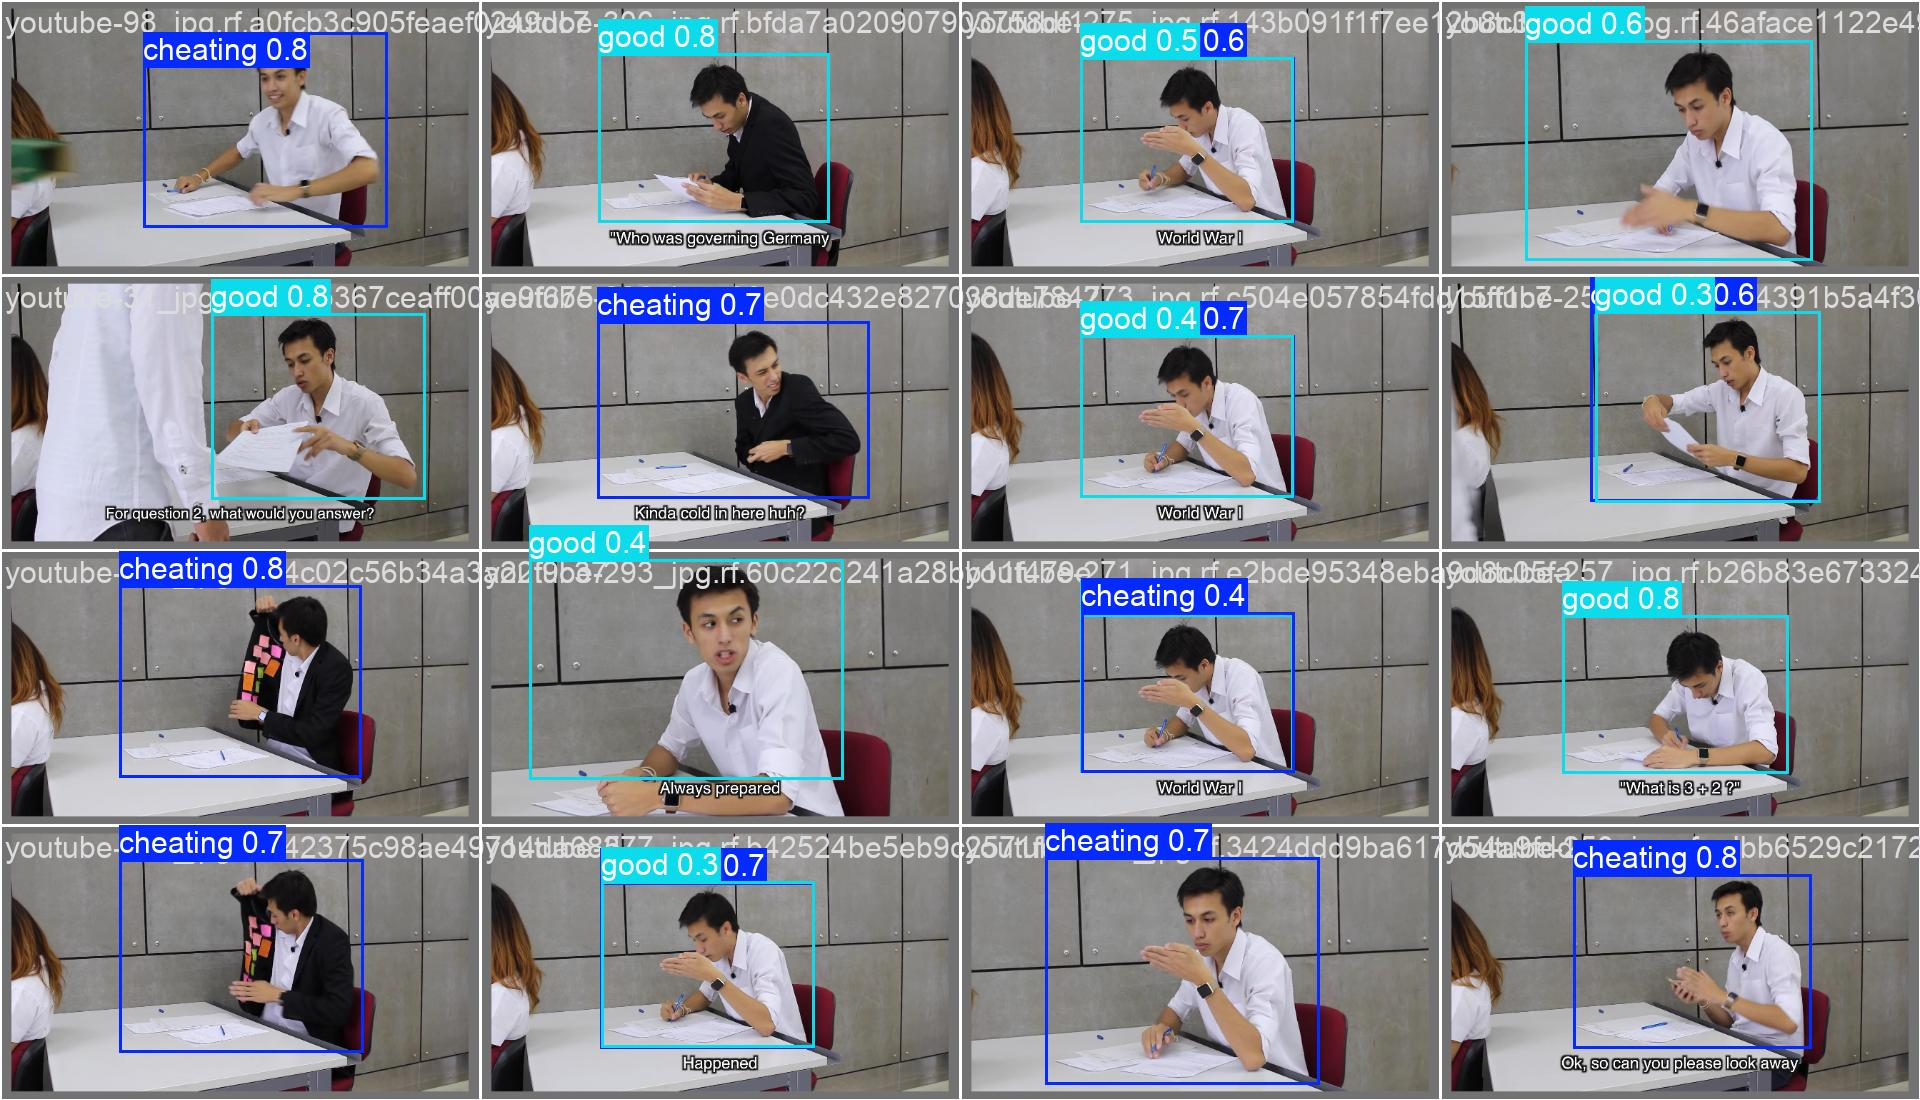

In [27]:
from IPython.display import Image as IPyImage

IPyImage(filename='/Users/himanshujha/Jupyter Contents/Computer Vision Project/runs/detect/train2/val_batch0_pred.jpg', width=600)

In [30]:
!yolo task=detect mode=val model="/Users/himanshujha/Jupyter Contents/Computer Vision Project/runs/detect/train2/weights/best.pt" data="/Users/himanshujha/Jupyter Contents/Computer Vision Project/Exam-Monitoring-System-v2-1/data.yaml"


Ultralytics 8.3.40 🚀 Python-3.12.7 torch-2.7.0 CPU (Apple M1)
YOLO11s summary (fused): 238 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Scanning /Users/himanshujha/Jupyter Contents/Computer Vision Project/Exam-M
/opt/anaconda3/lib/python3.12/site-packages/torch/utils/data/dataloader.py:683: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        457        593      0.547      0.679      0.638      0.435
              cheating        271        335       0.58       0.54      0.554      0.342
                  good        219        258      0.513      0.818      0.721      0.528
Speed: 0.7ms preprocess, 335.3ms inference, 0.0ms loss, 0.3ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [31]:
!yolo task=detect mode=predict model= "/Users/himanshujha/Jupyter Contents/Computer Vision Project"/runs/detect/train2/weights/best.pt conf=0.25 source="/Users/himanshujha/Jupyter Contents/Computer Vision Project/Exam-Monitoring-System-v2-1"/test/images save=True


Ultralytics 8.3.40 🚀 Python-3.12.7 torch-2.7.0 CPU (Apple M1)
YOLO11s summary (fused): 238 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs

image 1/214 /Users/himanshujha/Jupyter Contents/Computer Vision Project/Exam-Monitoring-System-v2-1/test/images/20220622_185436_jpg.rf.d417abb523156e361053b78169802078.jpg: 640x640 2 cheatings, 2 normals, 115.3ms
image 2/214 /Users/himanshujha/Jupyter Contents/Computer Vision Project/Exam-Monitoring-System-v2-1/test/images/20220622_185441_jpg.rf.8599e7af560fb2ec1343d69b9cb564ab.jpg: 640x640 3 cheatings, 1 normal, 108.3ms
image 3/214 /Users/himanshujha/Jupyter Contents/Computer Vision Project/Exam-Monitoring-System-v2-1/test/images/20220622_185519_jpg.rf.0b0dd88d92d4c3fda1dba509b89b0057.jpg: 640x640 2 cheatings, 1 normal, 108.0ms
image 4/214 /Users/himanshujha/Jupyter Contents/Computer Vision Project/Exam-Monitoring-System-v2-1/test/images/cheat06_jpg.rf.2b8f677592d769bc281ad5314322028b.jpg: 640x640 1 good, 105.7ms
image 5/214 /Users/himanshu

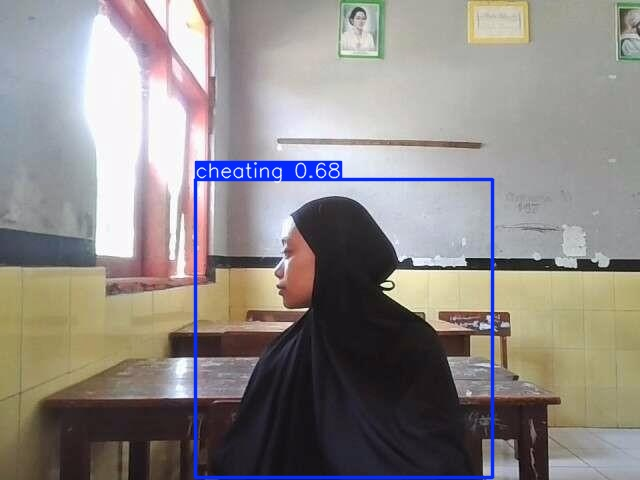

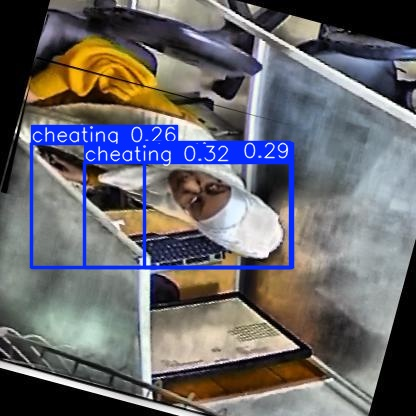

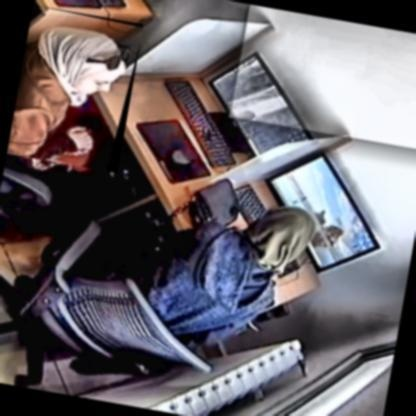

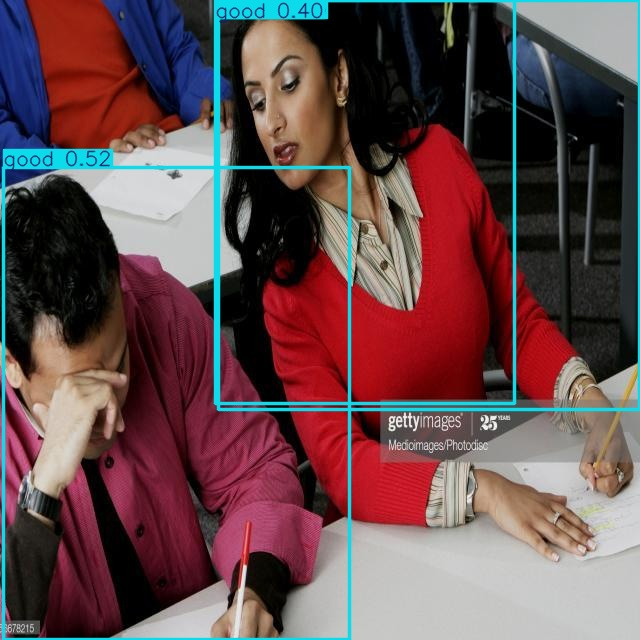

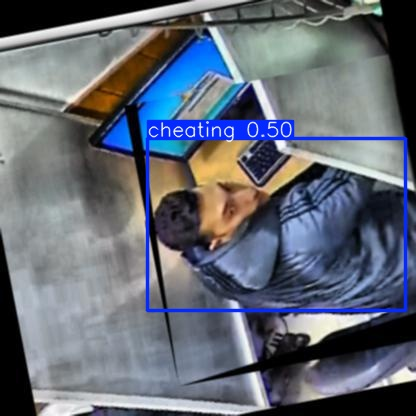

In [35]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/Users/himanshujha/Jupyter Contents/Computer Vision Project/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[5:10]:
    display(IPyImage(filename=img, width=600))
    print("\n")